# Evaluation of Multi-Tier Framework for measuring access to electricity - Rwanda

The Multi-Tier Framework (MTF) helps to measure the energy access taking into consideration seven attributes that can be categorized on Tiers from 0 to 5. Meaning that tier 0 is no access at all and tier 5 full access. The variables that measure the tiers change depending on the attributes.

## Importing the useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import math
import plotly.express as px

From the data collected, the analysis of the attributes is as follows:

## Importing the dataset

In [2]:
df = pd.read_csv('Main_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B1,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,2.0,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.61765,0.0
1,1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.04202,0.0
2,2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.04202,0.0
3,3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.04202,0.0
4,4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,2.0,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.04202,0.0


## Analysing different Attributes

Attributes which are analysed for MTF_Rwanda_Questionnaire_Household: 

1. Capacity
2. Availability
3. Reliability
4. Quality
5. Affordability
6. Formality
7. Health and safety

# Attribute: Capacity

This attribute corresponds to the power capacity of the household and is measured in Wh. To find out the power capacity, we need to know the different sources of power available. From our dataset:
    
1. C22: Power available from the national grid
2. C64: Power available from the mini grid
3. C88: Power available from the generator set
4. C117: Power available from the inverter
5. C119: Power available from the batteries
6. C151: Power available from solar panel (Not present in the dataset but is there in the survey)
7. C154: Power available from solar batteries (Not present in the dataset but is there in the survey)
8. Other source: Pico-Hyro (power capacity question not mentioned in the survey)

In [4]:
df_total= df[['C22', 'C64','C88','C117','C119A']]

## Renaming the columns

For a better understanding of the dataset, the columns are named as follows:

1. C22: National_Grid
2. C64: Mini_Grid
3. C88: Generator
4. C117: Inverter
5. C119A: Battery

In [5]:
df_total.columns = ['National_Grid', 'Mini_Grid','Generator','Inverter','Battery']

## Adding "Total capacity to the dataset"

In [6]:
lst=[]
for i in range(df_total.shape[0]):
    add=0
    gotnum= False
    for j in range(df_total.shape[1]):
        if math.isnan(df_total.iat[i,j])==False:
            gotnum=True
            add = add + df_total.iat[i,j]
    if gotnum :
        lst.append(add)
    else:
        lst.append(math.nan)
    
# Adding the above list to dataframe
df_total["Total_Capacity"] = lst

# Replacing the 0 values again with NaN
df_total.replace(0, np.nan, inplace=True)

## Formulating the column "Total capacity"

In [7]:
# The power capacity units provided in the dataset are in monthly kWh. 
# However, for TIER analysis the units are in daily Wh consumption. 
# Therefore, dividing the dataset by 30 and multiplying it by 1000.


df_total['Total_Capacity']= df_total.Total_Capacity.apply(lambda x: x if math.isnan(x) else (x*1000)/30)

In [8]:
df_total["Total_Capacity"] = df_total.Total_Capacity.apply(lambda x: "Missing_data" if math.isnan(x) else x)

In [9]:
df_total.tail()

,National_Grid,Mini_Grid,Generator,Inverter,Battery,Total_Capacity
3290,NaN,NaN,NaN,NaN,NaN,Missing_data
3291,4.65,NaN,NaN,NaN,NaN,155
3292,6.05,NaN,NaN,NaN,NaN,201.667
3293,4.65,NaN,NaN,NaN,NaN,155
3294,NaN,NaN,NaN,NaN,NaN,Missing_data


## Adding column "TIER" to the dataset 

In [10]:
def conditions(Total_Capacity):
    if Total_Capacity =='Missing_data':
        return "Missing_data"
    elif Total_Capacity<12:
        return "0"
    elif 12<=Total_Capacity<200:
        return "1"
    elif 200<=Total_Capacity<1000:
        return "2"
    elif 1000<=Total_Capacity<3400:
        return "3"
    elif 3400<=Total_Capacity<8200:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_total.Total_Capacity)
df_total["TIER_cap"] = transform

## Printing the TIER counts

In [11]:
df_total['TIER_cap'].value_counts()

Missing_data    1810
2                807
1                451
3                196
4                 27
5                  4
Name: TIER_cap, dtype: int64

### Visualizing the TIER levels with "Missing_data"

Text(0.5, 1.0, 'TIER levels based on power capacity')

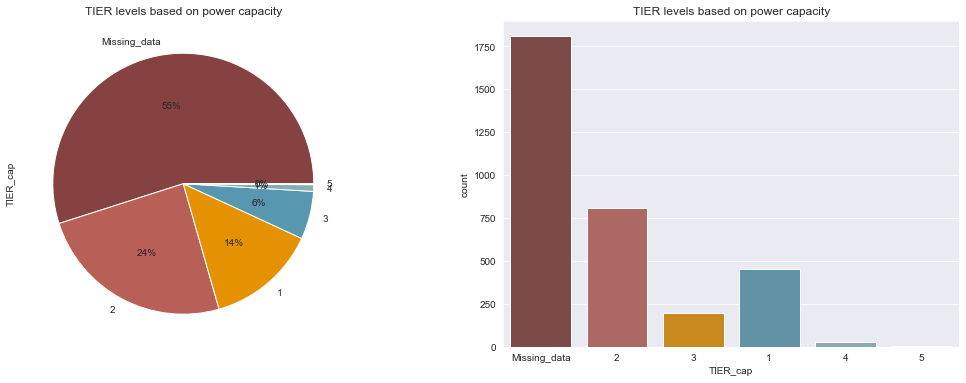

In [12]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_total['TIER_cap'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER_cap',data=df_total,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')



### Visualizing the TIER levels without "Missing_data"

In [13]:
df2_total = df_total[df_total != 'Missing_data'] 
df2_total=df2_total[['TIER_cap']]

Text(0.5, 1.0, 'TIER levels based on power capacity')

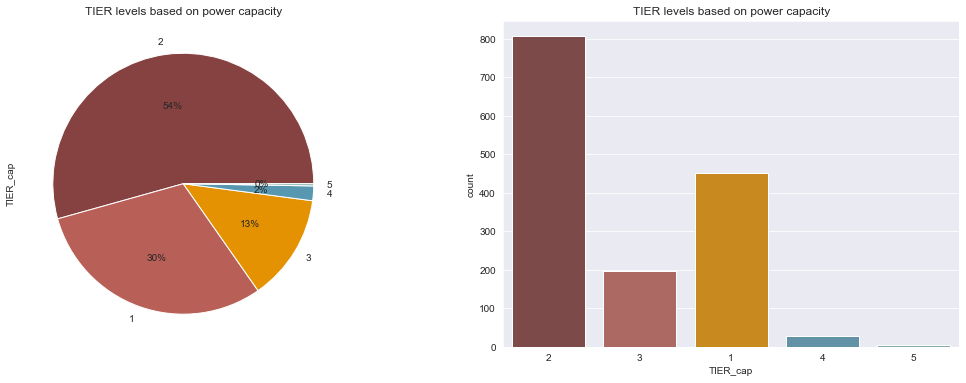

In [14]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2_total['TIER_cap'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER_cap',data=df2_total,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

In the above graph it can be seen:

1. TIER 1 corresponds to 30% of the households which recieves at least 12Wh of power supply
2. TIER 2 corresponds to 54% of the households which recieves at least 200Wh of power supply
3. TIER 3 corresponds to 13% of the households which recieves at least 1kWh of power supply
4. TIER 4 corresponds to 2% of the households which recieves at least 3.4kWh of power supply
5. TIER 5 corresponds to less than 1% of the households which recieves at least 8.2kWh of power supply


# Attribute: Availabilty

The availability relates to the hours of electricity supply that the household receives. For a better analysis the availability is measured per day hours (24/7), and evening hours (maximum of 4 hours).

## Availability: Day and night

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C26A represents the hours of electricity available each day and night from the national grid in the worst months. 
* Whereas, C26B represents the hours of electricity available each day and night from  the national grid in the typical months.
* C68A represents the hours of electricity available each day and night from the mini grid in the worst months.
* Whereas, C68B represents the hours of electricity available each day and night from  the mini grid in the typical months.
* C107A represents the hours of electricity available each day and night from the generator set in the worst months.
* Whereas, C107B represents the hours of electricity available each day and night from  the generator set in the typical months.
* C127 represents the hours of electricity available each day from the rechargeable battery.
* C137A represents the hours of electricity available each day and night from pico-hydro in the worst months.
* Whereas, C137B represents the hours of electricity available each day and night from  pico-hydro in the typical months.
* C172A represents the hours of electricity available each day and night from  main solar based devices in the worst months.
* Whereas, C172B represents the hours of electricity available each day and night from  main solar based devices in the typical months.

In [15]:
df_av= df[['C26A','C26B','C68A','C68B','C107A','C107B','C127','C137A','C137B','C172A','C172B']]

### Renaming the columns

In [16]:
df_av.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical','Battery','Pico_hydro_Worst','Pico_hydro_Typical','Solar_device_Worst','Solar_device_Typical']

In [17]:
df_av.tail()

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,Generator_set_Worst,Generator_set_Typical,Battery,Pico_hydro_Worst,Pico_hydro_Typical,Solar_device_Worst,Solar_device_Typical
3290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
3291,13.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,19.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3293,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   National_grid_Worst    652 non-null    float64
 1   National_grid_Typical  1591 non-null   float64
 2   Mini_grid_Worst        2 non-null      float64
 3   Mini_grid_Typical      8 non-null      float64
 4   Generator_set_Worst    1 non-null      float64
 5   Generator_set_Typical  1 non-null      float64
 6   Battery                4 non-null      float64
 7   Pico_hydro_Worst       3 non-null      float64
 8   Pico_hydro_Typical     5 non-null      float64
 9   Solar_device_Worst     39 non-null     float64
 10  Solar_device_Typical   109 non-null    float64
dtypes: float64(11)
memory usage: 283.3 KB


### Calculation

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [19]:
#National Grid
df_av['National_grid_Total'] = df_av.National_grid_Worst.fillna(value=df_av.National_grid_Typical)

#National Grid
df_av['Mini_grid_Total'] = df_av.Mini_grid_Worst.fillna(value=df_av.Mini_grid_Typical)

#Generator Set
df_av['Generator_set_Total'] = df_av.Generator_set_Worst.fillna(value=df_av.Generator_set_Typical)

#Pico Hydro
df_av['Pico_hydro_Total'] = df_av.Pico_hydro_Worst.fillna(value=df_av.Pico_hydro_Typical)

#Solar Devicce
df_av['Solar_device_Total'] = df_av.Solar_device_Worst.fillna(value=df_av.Solar_device_Typical)


#Taking only the total values into consideration
df_av_new=df_av[['National_grid_Total','Mini_grid_Total','Generator_set_Total','Pico_hydro_Total','Solar_device_Total','Battery']]

In [20]:
df_av_new.tail()

,National_grid_Total,Mini_grid_Total,Generator_set_Total,Pico_hydro_Total,Solar_device_Total,Battery
3290,NaN,NaN,NaN,NaN,1.0,NaN
3291,13.0,NaN,NaN,NaN,NaN,NaN
3292,19.0,NaN,NaN,NaN,NaN,NaN
3293,23.0,NaN,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN,NaN


### Changing the string variables into float/int 

In [21]:
df_av_new=df_av_new.replace(to_replace="Don't know",value=0)

In [22]:
df_av_new= df_av_new.apply(pd.to_numeric, errors='coerce')

In [23]:
df_av_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  1591 non-null   float64
 1   Mini_grid_Total      8 non-null      float64
 2   Generator_set_Total  1 non-null      float64
 3   Pico_hydro_Total     5 non-null      float64
 4   Solar_device_Total   110 non-null    float64
 5   Battery              4 non-null      float64
dtypes: float64(6)
memory usage: 154.6 KB


### Calculating the total availability

In [24]:
lst=[]
for i in range(df_av_new.shape[0]):
    add=0
    gotnum= False
    for j in range(df_av_new.shape[1]):
        if math.isnan(df_av_new.iat[i,j])==False:
            gotnum=True
            add = add + df_av_new.iat[i,j]
    if gotnum :
        lst.append(add)
    else:
        lst.append(math.nan)
    
# adding list to dataframe
df_av_new["Total_availability"] = lst

In [25]:
df_av_new.tail()

,National_grid_Total,Mini_grid_Total,Generator_set_Total,Pico_hydro_Total,Solar_device_Total,Battery,Total_availability
3290,NaN,NaN,NaN,NaN,1.0,NaN,1.0
3291,13.0,NaN,NaN,NaN,NaN,NaN,13.0
3292,19.0,NaN,NaN,NaN,NaN,NaN,19.0
3293,23.0,NaN,NaN,NaN,NaN,NaN,23.0
3294,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_av_new=df_av_new[['Total_availability']]

### Replacing NaN and "Don't know" values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [27]:
df_av_new['Total_availability'] = df_av_new.replace(np.nan, 'Missing_data', regex=True)

In [28]:
df_av_new.tail()

,Total_availability
3290,1
3291,13
3292,19
3293,23
3294,Missing_data


### Adding column "TIER" to the dataset 

In [29]:
# AVAILABILITY: Day
#Note: conditions for TIER 1 and 2 are the same

def conditions(Total_availability):
    if Total_availability == 'Missing_data':
        return "Missing_data"
    elif Total_availability<4:
        return "0"
    elif 4<=Total_availability<8:
        return "1&2"
    elif 8<=Total_availability<16:
        return "3"
    elif 16<=Total_availability<23:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_av_new.Total_availability)
df_av_new["TIER_av"] = transform

In [30]:
df_av_new['TIER_av'].value_counts()

Missing_data    1598
5                701
4                589
3                210
1&2              102
0                 95
Name: TIER_av, dtype: int64

#### Visualizing the TIER levels with "Missing_data"

Text(0.5, 1.0, 'TIER levels based on day and night power availability')

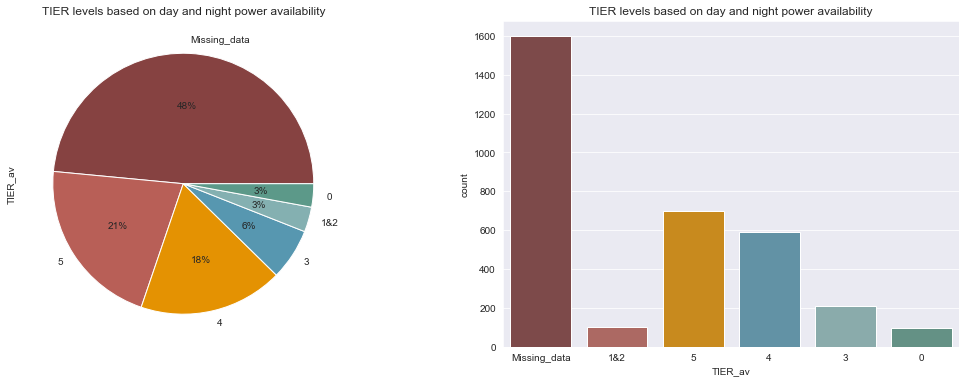

In [31]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_av_new['TIER_av'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on day and night power availability')

#Barplot
sns.countplot('TIER_av',data=df_av_new,ax=ax[1])
ax[1].set_title('TIER levels based on day and night power availability')

#### Visualizing the TIER levels without "Missing_data"

In [32]:
df2_av = df_av_new[df_av_new != 'Missing_data'] 


In [33]:
df2_av=df2_av[['TIER_av']]

Text(0.5, 1.0, 'TIER levels based on power capacity')

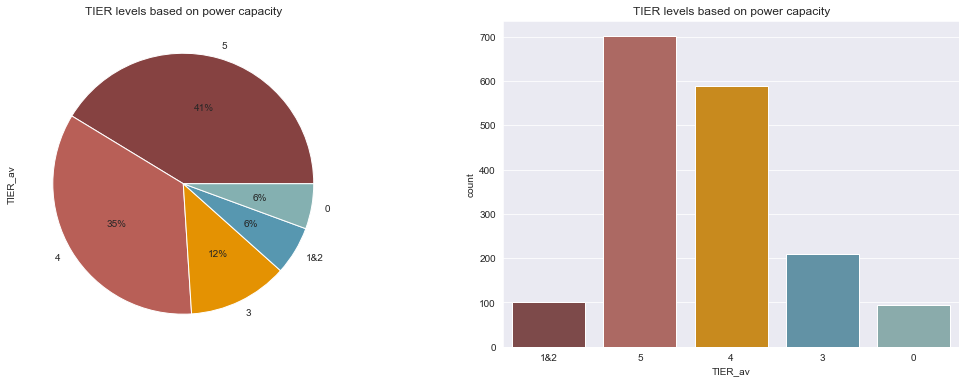

In [34]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2_av['TIER_av'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER_av',data=df2_av,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

In the above graph we can see that the daily availability in:

1. TIER 0 contributes to 6% of evening availability which is less than 4 hours
2. TIER 1&2 contributes to 6% of evening availability which is at least 4 hours
3. TIER 3 contributes to 12% of evening availability which is at least 8 hours
4. TIER 4 contributes to 35% of evening availability which is at least 16 hours
4. TIER 5 contributes to 41% of evening availability which is at least 23 hours

## Attribute: Availabilty (Evening)

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C27A represents the hours of electricity available each evening from the national grid in the worst months. 
* Whereas, C27B represents the hours of electricity available each evening from  the national grid in the typical months.
* C69A represents the hours of electricity available each evening from the mini grid in the worst months.
* Whereas, C69B represents the hours of electricity available each evening from  the mini grid in the typical months.
* C108A represents the hours of electricity available each evening from the generator set in the worst months.
* Whereas, C108B represents the hours of electricity available each evening from  the generator set in the typical months.
* C138A represents the hours of electricity available each evening from pico-hydro in the worst months.
* Whereas, C138B represents the hours of electricity available each evening from  pico-hydro in the typical months.
* C173A represents the hours of electricity available each evening from main solar based devices in the worst months.
* Whereas, C173B represents the hours of electricity available each evening from  main solar based devices in the typical months.

In [35]:
df_ave= df[['C27A','C27B','C69A','C69B','C108A','C108B','C138A','C138B','C173A','C173B']]

### Renaming the columns

In [36]:
df_ave.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical','Pico_hydro_Worst','Pico_hydro_Typical','Solar_device_Worst','Solar_device_Typical']

In [37]:
df_ave.tail()

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,Generator_set_Worst,Generator_set_Typical,Pico_hydro_Worst,Pico_hydro_Typical,Solar_device_Worst,Solar_device_Typical
3290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
3291,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3293,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_ave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   National_grid_Worst    652 non-null    float64
 1   National_grid_Typical  1591 non-null   float64
 2   Mini_grid_Worst        2 non-null      float64
 3   Mini_grid_Typical      8 non-null      float64
 4   Generator_set_Worst    1 non-null      float64
 5   Generator_set_Typical  1 non-null      float64
 6   Pico_hydro_Worst       3 non-null      float64
 7   Pico_hydro_Typical     5 non-null      float64
 8   Solar_device_Worst     39 non-null     float64
 9   Solar_device_Typical   109 non-null    float64
dtypes: float64(10)
memory usage: 257.5 KB


### Calculation

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [39]:
#National Grid
df_ave['National_grid_Total'] = df_ave.National_grid_Worst.fillna(value=df_ave.National_grid_Typical)

#National Grid
df_ave['Mini_grid_Total'] = df_ave.Mini_grid_Worst.fillna(value=df_ave.Mini_grid_Typical)

#Generator Set
df_ave['Generator_set_Total'] = df_ave.Generator_set_Worst.fillna(value=df_ave.Generator_set_Typical)

#Pico Hydro
df_ave['Pico_hydro_Total'] = df_ave.Pico_hydro_Worst.fillna(value=df_ave.Pico_hydro_Typical)

#Solar Devicce
df_ave['Solar_device_Total'] = df_ave.Solar_device_Worst.fillna(value=df_ave.Solar_device_Typical)


#Taking only the total values into consideration
df_ave_new=df_ave[['National_grid_Total','Mini_grid_Total','Generator_set_Total','Pico_hydro_Total','Solar_device_Total']]

### Changing the string variables into float/int 

In [40]:
df_ave_new=df_ave_new.replace(to_replace="Don't know",value=0)

In [41]:
df_ave_new= df_ave_new.apply(pd.to_numeric, errors='coerce')

### Calculating the total availability

In [42]:
lst=[]
for i in range(df_ave_new.shape[0]):
    add=0
    gotnum= False
    for j in range(df_ave_new.shape[1]):
        if math.isnan(df_ave_new.iat[i,j])==False:
            gotnum=True
            add = add + df_ave_new.iat[i,j]
    if gotnum :
        lst.append(add)
    else:
        lst.append(math.nan)
    
# adding list to dataframe
df_ave_new["Total_availability"] = lst

In [43]:
df_ave_new=df_ave_new[['Total_availability']]

### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [44]:
df_ave_new['Total_availability'] = df_ave_new.replace(np.nan, 'Missing_data', regex=True)

### Adding column "TIER" to the dataset 

In [45]:
# AVAILABILITY: Day
#Note: conditions for TIER 4 and 5 are the same

def conditions(Total_availability):
    if Total_availability == 'Missing_data':
        return "Missing_data"
    elif Total_availability==0:
        return "Missing_data"
    elif 0<Total_availability<1:
        return "0"
    elif 1<=Total_availability<2:
        return "1"
    elif 2<=Total_availability<3:
        return "2"
    elif 3<=Total_availability<4:
        return "3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_ave_new.Total_availability)
df_ave_new["TIER"] = transform

In [46]:
df_ave_new['TIER'].value_counts()

Missing_data    1602
4&5              901
3                408
2                248
1                136
Name: TIER, dtype: int64

#### Visualizing the TIER levels with "Missing_data"

Text(0.5, 1.0, 'TIER levels based on evening power availability')

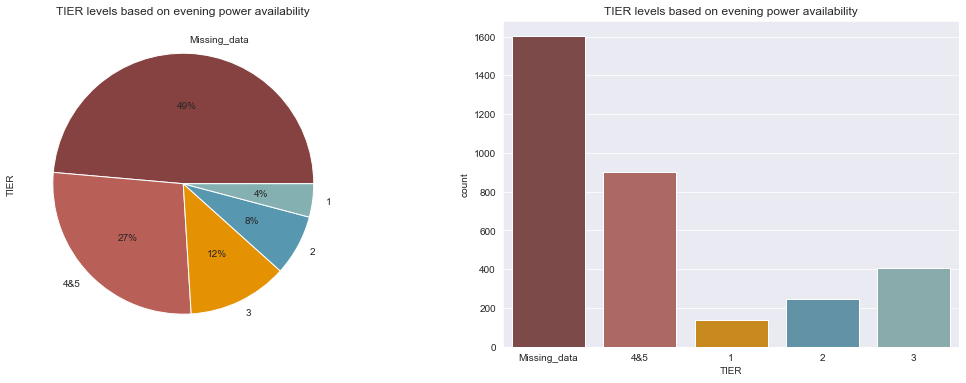

In [47]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_ave_new['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on evening power availability')

#Barplot
sns.countplot('TIER',data=df_ave_new,ax=ax[1])
ax[1].set_title('TIER levels based on evening power availability')

#### Visualizing the TIER levels without "Missing_data"

In [48]:
df2 = df_ave_new[df_ave_new != 'Missing_data'] 


Text(0.5, 1.0, 'TIER levels based on power capacity')

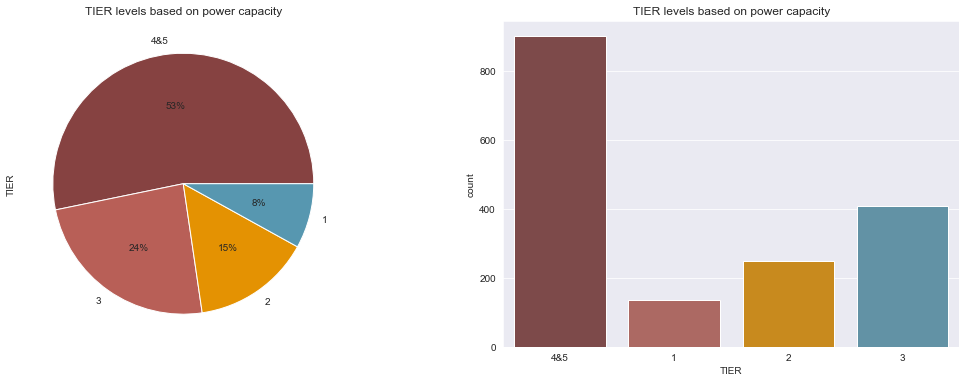

In [49]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER',data=df2,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

In the above graph we can see that the evening availability in:

1. TIER 1 contributes to 8% of evening availability which is at least 1 hours
2. TIER 2 contributes to 15% of evening availability which is at least 2 hours
3. TIER 3 contributes to 24% of evening availability which is at least 3 hours
4. TIER 4&5 contributes to 53% of evening availability which is at least 4 hours

# Attribute: Reliability

Methodology:

This indicator was developed to know how many disruptions of energy supply does the household suffer, and the duration of it. To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 
* C29A represents the electricity disruption from the national grid in the worst months. 
* Whereas, C29B represents the electricity disruption from the national grid in the actual months.
* C30A represents the duration of the outages from the national grid in the worst months. 
* C30B represents the duration of the outagesfrom the national grid in the worst months. 
* C71A represents the electricity disruption from the mini grid in the actual months. 
* Whereas, C71B represents the electricity disruption from the mini grid in the actual months.
* C72A represents the duration of the outages from the mini grid in the worst months. 
* C72B represents the duration of the outages from the mini grid in the actual months. 


In [50]:
df_rel= df[['C29A','C29B','C30A','C30B','C71A','C71B','C72A','C72B']]

## Renaming the columns

In [51]:
df_rel.columns = ['National_grid_Worst','National_grid_Typical','National_duration_Worst','National_duration_Typical','Mini_grid_Worst','Mini_grid_Typical','Mini_duration_Worst','Mini_duration_Typical']

In [52]:
df_rel=df_rel.replace(to_replace=888,value=math.nan)

## Calculation

In this step Total reliability from all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [53]:
#National Grid
df_rel['National_grid_Total'] = df_rel.National_grid_Worst.fillna(value=df_rel.National_grid_Typical)

#Duration_national
df_rel['National_duration_Total'] = df_rel.National_duration_Worst.fillna(value=df_rel.National_duration_Typical)

#Mini Grid
df_rel['Mini_grid_Total'] = df_rel.Mini_grid_Worst.fillna(value=df_rel.Mini_grid_Typical)

#Duration_mini
df_rel['Mini_duration_Total'] = df_rel.Mini_duration_Worst.fillna(value=df_rel.Mini_duration_Typical)

#Taking only the total values into consideration
df_rel_new=df_rel[['National_grid_Total','National_duration_Total','Mini_grid_Total','Mini_duration_Total']]

In [54]:
df_rel_new.tail()

,National_grid_Total,National_duration_Total,Mini_grid_Total,Mini_duration_Total
3290,NaN,NaN,NaN,NaN
3291,3.0,5.0,NaN,NaN
3292,1.0,NaN,NaN,NaN
3293,2.0,10.0,NaN,NaN
3294,NaN,NaN,NaN,NaN


## Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [55]:
df_rel_new=df_rel_new.replace(to_replace=math.nan,value='Missing_data')

## Adding column "TIER" to the dataset 

In [56]:
lst=[]
for i in range (df_rel_new.shape[0]):
    value=""
    grid_total = df_rel_new.iat[i,0]
    duration_total = df_rel_new.iat[i,1]
    if isinstance(grid_total, str) and grid_total=="Missing_data":
        value = "Missing_data"
    elif isinstance(duration_total, str) and duration_total=="Missing_data":
        value = "Missing_data"
    elif 0<grid_total<=3 and duration_total<2 :
        value = "5"
    elif 3<grid_total<=14 and duration_total>2:
        value = "3&4"
    else:
        value = "0,1&2"
    lst.append(value)
       
# adding list to dataframe
df_rel_new["TIER_rel"] = lst

In [57]:
df_rel_new['TIER_rel'].value_counts()

Missing_data    1983
0,1&2           1083
5                125
3&4              104
Name: TIER_rel, dtype: int64

### Visualizing the TIER levels with "Missing_data"

Text(0.5, 1.0, 'TIER levels based on reliability')

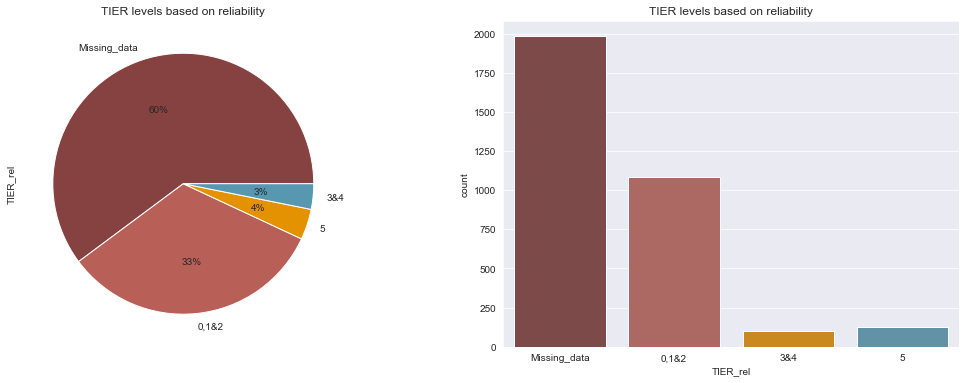

In [58]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_rel_new['TIER_rel'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('TIER_rel',data=df_rel_new,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

### Visualizing the TIER levels without "Missing_data"

In [59]:
df2_rel = df_rel_new[df_rel_new != 'Missing_data'] 


In [60]:
df2_rel=df2_rel[['TIER_rel']]

Text(0.5, 1.0, 'TIER levels based on reliability')

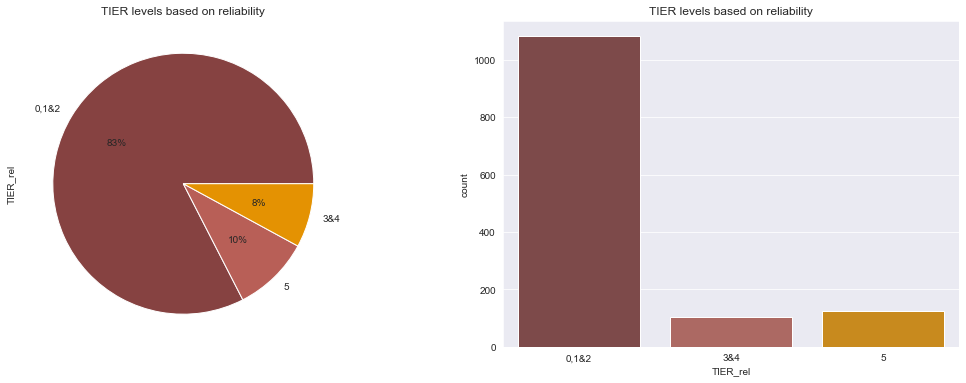

In [61]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2_rel['TIER_rel'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Boxplot
sns.countplot('TIER_rel',data=df2_rel,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

In the above graph we can see:

1. TIER 5 contributes to only 10% of disruptions which is at most 3 disruptions per week with total duration of less than 2 hours
2. TIER 3 & 4 contributes to 8% of disruptions which is at most 14 disruptions per week and more than 3 disruptions per week with total duration of more than 2 hours
3. Most of the disruptions/outages in the power supply is in TIER 0,1 and 2 which is 83%

# Attribute: Quality

Methodology:

The quality attribute refers to if the household had experienced voltage problems that damaged the appliances or its desired use. To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C39 represents the damaged appliances from the national grid. 
* C81 represents the damaged appliances from the mini grid.
* C110 represents the damaged appliances from the generator set.
* C140 represents the damaged appliances from the Pico-hydro.

In [62]:
df_q= df[['C39','C81','C110','C140']]

## Renaming the columns

In [63]:
df_q.columns = ['National_grid', 'Mini_grid','Generator_set','Pico_hydro']

In [64]:
df_q.tail()

,National_grid,Mini_grid,Generator_set,Pico_hydro
3290,NaN,NaN,NaN,NaN
3291,1.0,NaN,NaN,NaN
3292,2.0,NaN,NaN,NaN
3293,2.0,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN


In [65]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   National_grid  1591 non-null   float64
 1   Mini_grid      8 non-null      float64
 2   Generator_set  1 non-null      float64
 3   Pico_hydro     5 non-null      float64
dtypes: float64(4)
memory usage: 103.1 KB


## Changing the string variables into float/int 

In [66]:
df_q=df_q.replace(to_replace="Don?t know",value='Missing_data')

## Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [67]:
df_q = df_q.replace(np.nan, 'Missing_data', regex=True)

In [68]:
df_q=df_q[['National_grid']]

In [69]:
def conditions(National_grid):
    if National_grid == 'Missing_data':
        return "Missing_data"
    elif National_grid==888:
        return "Missing_data"
    elif National_grid==1:
        return "0,1,2&3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_q.National_grid)
df_q["TIER_q"] = transform

### Visualizing the TIER levels with "Missing_data"

Text(0.5, 1.0, 'TIER levels based on power quality')

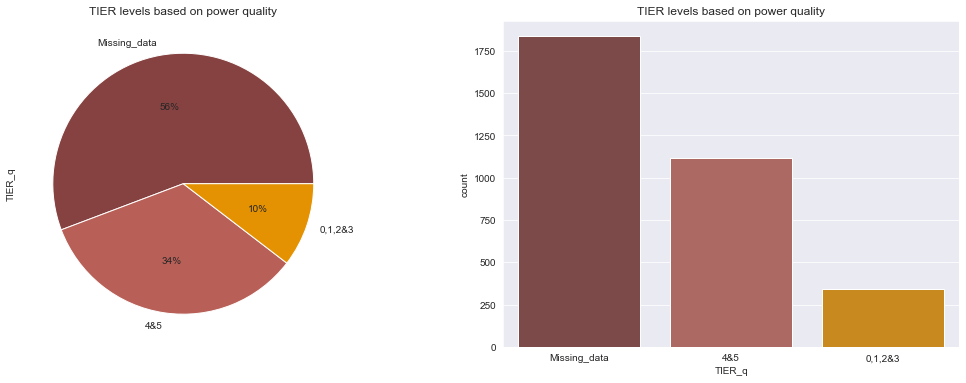

In [70]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_q['TIER_q'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power quality')

#Barplot
sns.countplot('TIER_q',data=df_q,ax=ax[1])
ax[1].set_title('TIER levels based on power quality')

### Visualizing the TIER levels without "Missing_data"

In [71]:
df2_q = df_q[df_q != 'Missing_data'] 


In [72]:
df2_q=df2_q[['TIER_q']]

Text(0.5, 1.0, 'TIER levels based on quality')

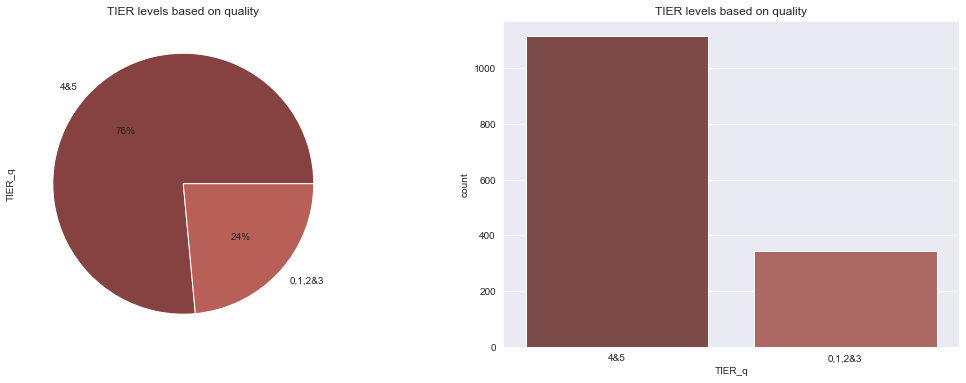

In [73]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df2_q['TIER_q'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on quality')

#Barplot
sns.countplot('TIER_q',data=df2_q,ax=ax[1])
ax[1].set_title('TIER levels based on quality')

# Attribute: Affordability 


For the case of Rwanda, the information about affordability couldn’t be collected.


# Attribute: Formality

Methodology:

This attribute relates to the payments of the electricity supply. To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C17 represents the electricity bill payment for using the national grid. 
* C57 represents the electricity bill payment for using the mini grid.

In [74]:
df_f= df[['C17','C57']]

## Renaming the columns

In [75]:
df_f.columns = ['National_grid', 'Mini_grid']

In [76]:
df_f.head()

,National_grid,Mini_grid
0,4.0,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


## Replacing NaN values with "Missing_data"

In [77]:
df_f = df_f.replace(np.nan, 'Missing_data', regex=True)

## Focusing on National grid

In [78]:
# No bill paid for electricity= TIER 0-3
# Bill paid for electricity= TIER 4&5

def conditions(National_grid):
    if National_grid == 'Missing_data':
        return "Missing_data"
    elif National_grid==111:
        return "0,1,2&3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_f.National_grid)
df_f["TIER_f"] = transform

### Visualizing the TIER levels with "Missing_data"

Text(0.5, 1, 'TIER levels based on formality')

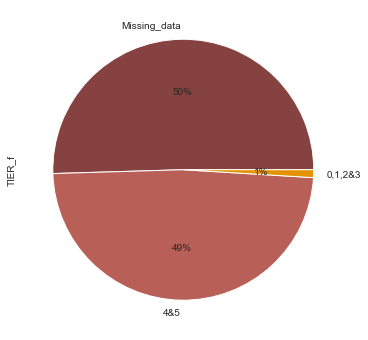

In [79]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

df_f['TIER_f'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on formality')

### Visualizing the TIER levels without "Missing_data"

In [80]:
df2_f = df_f[df_f != 'Missing_data'] 


In [81]:
df2_f=df2_f[['TIER_f']]

Text(0.5, 1, 'TIER levels based on formality')

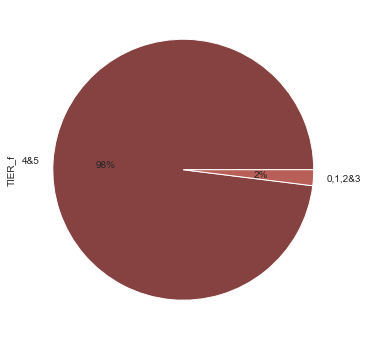

In [82]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

df2_f['TIER_f'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on formality')

In the above graph we can see:

1. Only 2% lies in TIER 0-3 for not paying the electricity bill
2. 98% lies in TIER 4-5 for paying the electricity bill

# Attribute: Health and Safety

Methodology:

Health and Safety relates to the accidents (serious or fatal) that could occur because of the electricity connection. To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C41 represents the accidents caused using the national grid. 
* C83 represents the accidents caused using the mini grid.
* C112 represents the accidents caused using the generator set.
* C130 represents the accidents caused using the battery.
* C142 represents the accidents caused using the Pico-hydro.
* C175 represents the accidents caused using the solar based devices.

In [83]:
df_hs= df[['C41','C83','C112','C130','C142','C175']]

In [84]:
df_hs.columns = ['National_grid', 'Mini_grid','Generator_set','Battery','Pico_hydro','Solar_devices']

In [85]:
df_hs.head()

,National_grid,Mini_grid,Generator_set,Battery,Pico_hydro,Solar_devices
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


## Focusing on National grid

In [86]:
df_hs = df_hs.replace(np.nan, 'Missing_data', regex=True)

In [87]:
def conditions(National_grid):
    if National_grid == 'Missing_data':
        return "Missing_data"
    elif National_grid=='Yes' :
        return "0,1,2&3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_hs.National_grid)
df_hs["TIER_hs"] = transform

### Visualizing the TIER levels with "Missing_data"

Text(0.5, 1, 'TIER levels based on Health and safety')

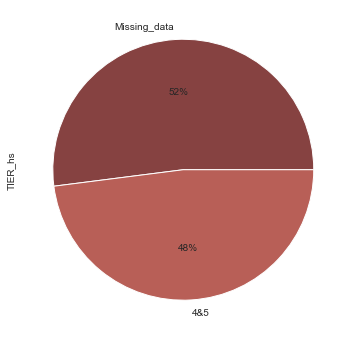

In [88]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

df_hs['TIER_hs'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on Health and safety')

### Visualizing the TIER levels without "Missing_data"

In [89]:
df2_hs = df_hs[df_hs != 'Missing_data'] 


In [90]:
df2_hs=df2_hs[['TIER_hs']]

Text(0.5, 1, 'TIER levels based on Health and safety')

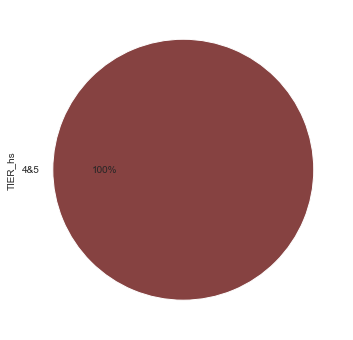

In [91]:
# Setting up the ESMAP color pallette
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']
sns.set_palette(esmap_colors)

df2_hs['TIER_hs'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on Health and safety')

The above figure shows that no one from grid-connected households reported a serious accident caused by
electrocution.

# Importing the dataset with all the attributes

In [92]:
# df_MTF=df[['C22', 'C64','C88','C117','C119A','C26A','C26B','C68A','C68B','C107A','C107B','C127','C137A','C137B','C172A','C172B','C27A','C27B','C69A','C69B','C108A','C108B','C138A','C138B','C173A','C173B','C29A','C29B','C71A','C71B','C39','C81','C110','C140','C17','C57','C41','C83','C112','C130','C142','C175']]

In [93]:
# df_MTF.to_csv("Rwanda_Electricity.csv")

# Visualising all the grouped TIERs together

In [94]:
df_TIER= pd.concat([df2_total,df2_av,df2_rel,df2_q,df2_f,df2_hs])

In [95]:
df_TIER.columns = ['Capacity', 'Availability','Reliability','Quality','Formality','Health_Safety']

In [96]:
df_plot = pd.DataFrame(columns=['Attribute'])
df_plot['Attribute']=["Capacity","Availability","Reliability","Quality","Formality","Health_Safety"]

In [97]:
df_plot

,Attribute
0,Capacity
1,Availability
2,Reliability
3,Quality
4,Formality
5,Health_Safety


In [98]:
op=df_TIER['Capacity'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot.loc[0, tier] = items[1]

op=df_TIER['Availability'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot.loc[1, tier] = items[1]
    
op=df_TIER['Reliability'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot.loc[2, tier] = items[1]
    
op=df_TIER['Quality'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot.loc[3, tier] = items[1]

op=df_TIER['Formality'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot.loc[4, tier] = items[1]
    
op=df_TIER['Health_Safety'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot.loc[5, tier] = items[1]

In [99]:
df_plot = df_plot.replace(np.nan, 0)

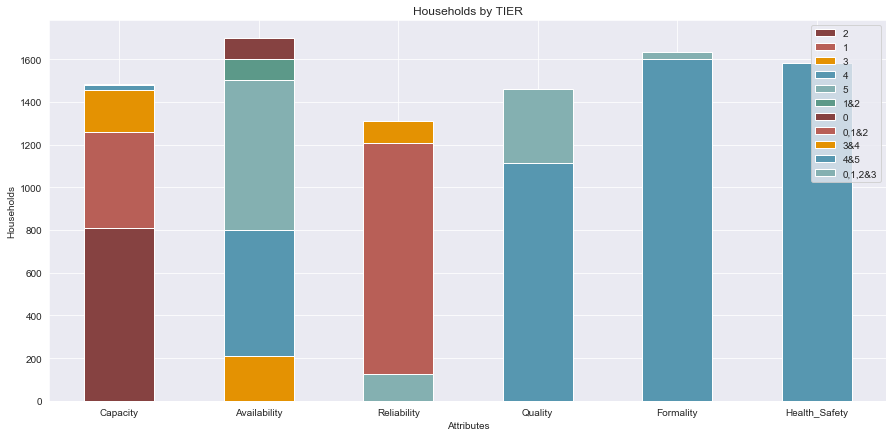

In [100]:
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']

sns.set_palette(esmap_colors)

ax=df_plot.plot(x="Attribute", y=["2","1","3","4","5","1&2","0","0,1&2","3&4","4&5","0,1,2&3"],kind='bar', stacked=True,figsize=(15,7))

ax.set(ylabel="Households",xlabel='Attributes', title="Households by TIER")

#Adjusting the ticks
for item in ax.get_xticklabels():
    item.set_rotation(0)

plt.show()


# Visualising only TIERs 0-5

In [101]:
df_TIER_new=df_TIER

In [102]:
df_TIER_new['Reliability'].value_counts()

0,1&2    1083
5         125
3&4       104
Name: Reliability, dtype: int64

In [103]:
df_TIER_new = df_TIER_new.replace(('0,1,2&3','0,1&2','1&2','3&4','4&5'), ('0','0','1','3','4'),regex=True)

In [104]:
df_plot_new = pd.DataFrame(columns=['Attribute'])
df_plot_new['Attribute']=["Capacity","Availability","Reliability","Quality","Formality","Health_Safety"]

In [105]:
op=df_TIER_new['Capacity'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot_new.loc[0, tier] = items[1]

op=df_TIER_new['Availability'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot_new.loc[1, tier] = items[1]
    
op=df_TIER_new['Reliability'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot_new.loc[2, tier] = items[1]
    
op=df_TIER_new['Quality'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot_new.loc[3, tier] = items[1]

op=df_TIER_new['Formality'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot_new.loc[4, tier] = items[1]
    
op=df_TIER_new['Health_Safety'].value_counts()
for items in op.iteritems(): 
    tier = items[0]
    df_plot_new.loc[5, tier] = items[1]
    

#Replacing nan values with 0    
df_plot_new = df_plot_new.replace(np.nan, 0)

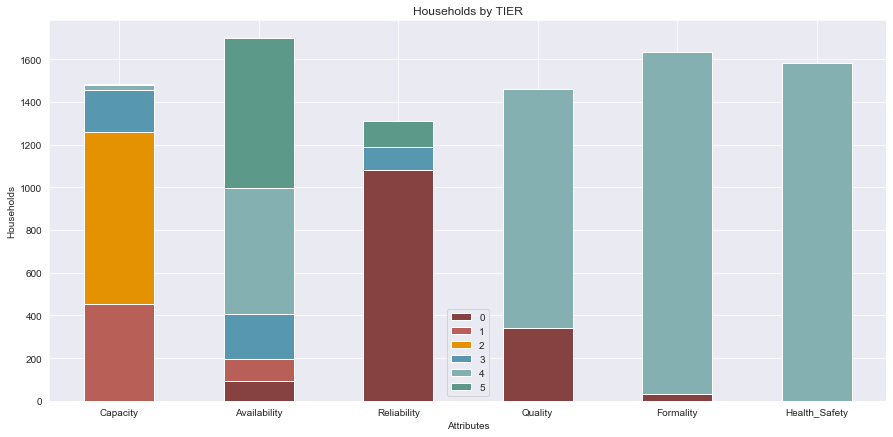

In [106]:
esmap_colors=['#864241','#B85F57','#E49202','#5797B0','#84B0B1','#5C9989']

sns.set_palette(esmap_colors)

ax=df_plot_new.plot(x="Attribute", y=['0',"1","2","3","4","5"],kind='bar', stacked=True,figsize=(15,7))

ax.set(ylabel="Households",xlabel='Attributes', title="Households by TIER")

#Adjusting the ticks
for item in ax.get_xticklabels():
    item.set_rotation(0)

plt.show()


# Aggregated Analysis: Index of Access to Household Electricity

To compile the information captured by the multi-tier matrix into a single number representing the level
of access to household electricity in a selected geographic area, a simple index can be calculated by
weighting the tiers and arriving at a weighted average. The following formula is applied:

$
\sum \limits _{k=0} ^{5}  20 * P_{k} * k $   |  Where,  $k$: tier number & $P_{k}$: proportion of households at the kth tier 


In [107]:
df_plot_new

,Attribute,2,1,3,4,5,0
0,Capacity,807.0,451.0,196.0,27.0,4.0,0.0
1,Availability,0.0,102.0,210.0,589.0,701.0,95.0
2,Reliability,0.0,0.0,104.0,0.0,125.0,1083.0
3,Quality,0.0,0.0,0.0,1115.0,0.0,343.0
4,Formality,0.0,0.0,0.0,1600.0,0.0,32.0
5,Health_Safety,0.0,0.0,0.0,1581.0,0.0,0.0


In [108]:
df_AA= df_plot_new.sum(axis=0,numeric_only=True)
df_AA_new = df_AA/df_AA.sum()

add=0
for items in df_AA_new.iteritems(): 
    
    add= add + (20*float(items[0])*float(items[1]))
    
print("The Access Index (AI) for Rwanda is", int(add))


The Access Index (AI) for Rwanda is 60


Text(0.5, 1.0, 'TIER levels based on Index Calculation')

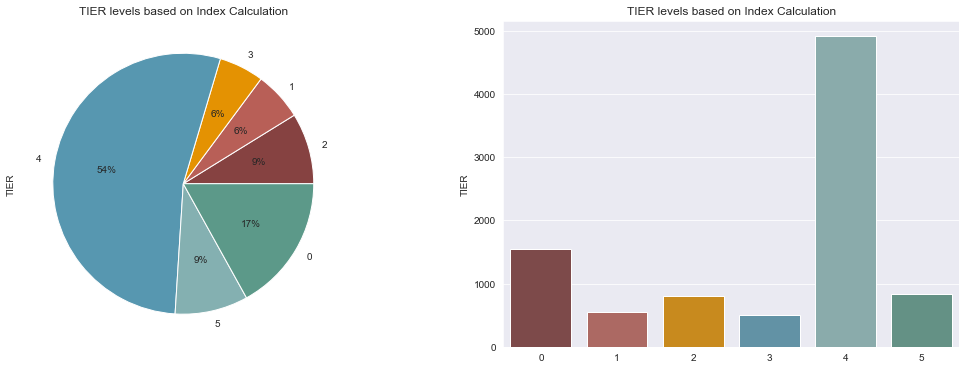

In [109]:
df_AA=df_AA.to_frame(name="TIER")

#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_AA['TIER'].plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on Index Calculation')

#Barplot
sns.barplot(x=['2',"1","3","4","5","0"], y="TIER", data=df_AA)
ax[1].set_title('TIER levels based on Index Calculation')

SyntaxError: illegal target for annotation (<ipython-input-120-ba4c04b0e814>, line 2)